<a href="https://colab.research.google.com/github/schizohub/ML_projects/blob/main/Ticket_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.linear_model import BayesianRidge
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso, ElasticNetCV
from sklearn.gaussian_process import GaussianProcessRegressor

In [80]:
train_data = pd.read_csv('/content/drive/MyDrive/train_data.csv',index_col=0)
train_data.head(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
id,,,,,,,,,,,
1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712
6,Air_India,AI-636,Delhi,Afternoon,one,Morning,Chennai,Business,20.42,5,45257
7,Vistara,UK-834,Chennai,Evening,one,Morning,Mumbai,Economy,18.42,20,5054
8,Air_India,AI-505,Bangalore,Morning,zero,Afternoon,Delhi,Business,2.58,30,32923
9,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Hyderabad,Economy,15.92,12,11383


In [81]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 20000
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           20000 non-null  object 
 1   flight            20000 non-null  object 
 2   source_city       20000 non-null  object 
 3   departure_time    20000 non-null  object 
 4   stops             20000 non-null  object 
 5   arrival_time      20000 non-null  object 
 6   destination_city  20000 non-null  object 
 7   class             20000 non-null  object 
 8   duration          20000 non-null  float64
 9   days_left         20000 non-null  int64  
 10  price             20000 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.8+ MB


In [82]:
df = train_data.copy()

In [75]:
df['stops'].value_counts()

one            16666
zero            2440
two_or_more      894
Name: stops, dtype: int64

In [76]:
df['airline'].value_counts()

Vistara      8535
Air_India    5371
Indigo       2924
GO_FIRST     1508
AirAsia      1056
SpiceJet      606
Name: airline, dtype: int64

In [77]:
df['flight'].value_counts()

UK-706     208
UK-720     190
UK-822     178
UK-836     169
UK-772     169
          ... 
6E-2471      1
6E-821       1
SG-1031      1
6E-759       1
6E-7201      1
Name: flight, Length: 1310, dtype: int64

In [8]:
df['source_city'].value_counts()

Mumbai       4068
Delhi        4022
Bangalore    3486
Kolkata      3092
Hyderabad    2748
Chennai      2584
Name: source_city, dtype: int64

In [9]:
df['departure_time'].value_counts()

Morning          4738
Early_Morning    4432
Evening          4341
Night            3231
Afternoon        3166
Late_Night         92
Name: departure_time, dtype: int64

In [10]:

df['arrival_time'].value_counts()

Night            6142
Evening          5316
Morning          4086
Afternoon        2536
Early_Morning    1004
Late_Night        916
Name: arrival_time, dtype: int64

In [11]:
df['destination_city'].value_counts()

Mumbai       3918
Delhi        3825
Bangalore    3425
Kolkata      3323
Hyderabad    2814
Chennai      2695
Name: destination_city, dtype: int64

In [12]:
df['class'].value_counts()

Economy     13753
Business     6247
Name: class, dtype: int64

In [13]:
a = ['Hyderabad']
b = df['source_city'].isin(a)
df[b].head(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
id,,,,,,,,,,,
2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
15,Air_India,AI-508,Hyderabad,Afternoon,one,Night,Delhi,Business,7.50,3,49063
24,Vistara,UK-894,Hyderabad,Evening,two_or_more,Morning,Kolkata,Economy,15.08,20,9643
38,Vistara,UK-878,Hyderabad,Afternoon,one,Morning,Chennai,Economy,19.92,36,6287
43,Vistara,UK-870,Hyderabad,Night,one,Afternoon,Mumbai,Business,16.00,40,66267
47,Vistara,UK-870,Hyderabad,Night,one,Night,Chennai,Business,23.67,41,51707
49,Air_India,AI-9881,Hyderabad,Afternoon,one,Evening,Bangalore,Economy,4.67,21,5040
61,Indigo,6E-425,Hyderabad,Afternoon,one,Night,Kolkata,Economy,6.17,33,17613
62,Air_India,AI-616,Hyderabad,Morning,one,Evening,Delhi,Business,9.83,19,39499


In [14]:
arr1 = df['source_city'].values
arr1[:10]

array(['Bangalore', 'Hyderabad', 'Bangalore', 'Kolkata', 'Chennai',
       'Delhi', 'Chennai', 'Bangalore', 'Bangalore', 'Chennai'],
      dtype=object)

In [15]:
arr2 = df['destination_city'].values
arr2[:10]

array(['Mumbai', 'Kolkata', 'Delhi', 'Hyderabad', 'Mumbai', 'Chennai',
       'Mumbai', 'Delhi', 'Hyderabad', 'Mumbai'], dtype=object)

In [16]:
arr1 = df['source_city'].index
jobs = []
for i in arr1:
  if df.loc[i]['source_city']==df.loc[i]['destination_city']:
      jobs.append(i)
  if df.loc[i]['departure_time']==df.loc[i]['arrival_time']:
      jobs.append(i)
  else:
      pass
# df.iloc[arr1[0]][2]==df.loc[arr1[0]][6]

In [17]:
len(jobs)

2685

In [18]:
df.iloc[jobs[1]]

airline                 Vistara
flight                   UK-894
source_city           Hyderabad
departure_time          Evening
stops               two_or_more
arrival_time            Morning
destination_city        Kolkata
class                   Economy
duration                  15.08
days_left                    20
price                      9643
Name: 24, dtype: object

In [ ]:
df.head(10)

In [21]:
ordinal = OrdinalEncoder()
main_df = pd.DataFrame(ordinal.fit_transform(df.drop(['duration','days_left','price'],axis=1)),columns=[df.columns[:8]]).astype(int)

In [ ]:
main_df[['duration','days_left','price']] = df[['duration','days_left','price']].copy()

In [22]:
main_df
cols = np.array(df.columns)[:8]
lisp = []
perl = []
for i in cols:
  lisp.append(main_df[i].value_counts())
  perl.append(df[i].value_counts())


In [ ]:
perl

In [ ]:
lisp

In [85]:
def change_func(x):
  ordinal = OrdinalEncoder()
  y = x[['airline','flight','source_city','departure_time','stops','arrival_time','destination_city','class']]
  maindf = pd.DataFrame(ordinal.fit_transform(y),columns=[x.columns[:8]]).astype(int)
  array_list = x.columns[:8]
  for i in array_list:
    x[i] = maindf[i].values.copy().astype(int)
  new_df = x
  return new_df

In [84]:
df['flight'] = df['flight'].apply(lambda x: x[:2])
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
id,,,,,,,,,,,
1,Vistara,UK,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
2,SpiceJet,SG,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
3,Vistara,UK,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
4,Vistara,UK,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
5,Indigo,6E,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712
...,...,...,...,...,...,...,...,...,...,...,...
19996,Indigo,6E,Bangalore,Night,one,Early_Morning,Mumbai,Economy,7.92,45,3153
19997,AirAsia,I5,Kolkata,Morning,one,Afternoon,Delhi,Economy,5.83,24,3911
19998,Vistara,UK,Chennai,Early_Morning,two_or_more,Evening,Bangalore,Economy,35.33,17,14822


In [86]:
change_func(df)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
id,,,,,,,,,,,
1,5,5,0,1,0,5,5,1,14.25,21,7212
2,4,4,3,2,2,5,4,1,1.75,7,5292
3,5,5,0,4,0,2,2,0,9.58,5,60553
4,5,5,4,4,0,2,3,1,6.75,28,5760
5,3,0,1,1,2,4,5,1,2.00,4,10712
...,...,...,...,...,...,...,...,...,...,...,...
19996,3,0,0,5,0,1,5,1,7.92,45,3153
19997,0,3,4,4,0,0,2,1,5.83,24,3911
19998,5,5,1,1,1,2,0,1,35.33,17,14822


In [27]:
df.corrwith(df['price'])

airline             0.241193
flight              0.306050
source_city         0.013570
departure_time      0.058520
stops              -0.201309
arrival_time        0.046801
destination_city    0.008747
class              -0.937868
duration            0.213158
days_left          -0.102545
price               1.000000
dtype: float64

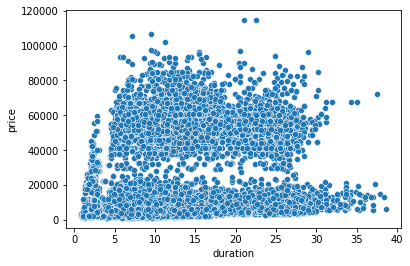

In [28]:
sns.scatterplot(data=df,x='duration',y='price')
plt.show()

In [29]:
X_train, X_test = train_test_split(df, test_size=0.3, random_state=200)

In [116]:
X_train_values = X_train.drop('price',axis=1)
y1 = X_train['price'].values
X_test_values = X_test.drop('price',axis=1)
y2 = X_test['price'].values

In [31]:
def prepared_data(x):
  std = StandardScaler()
  x_tau = std.fit_transform(x)
  return x_tau

In [124]:
x1 = prepared_data(X_train_values)
x2 = prepared_data(X_test_values)

In [125]:
lr_model = LinearRegression()
lr_model.fit(x1,y1)
prediction = lr_model.predict(x2)
MAE = metrics.mean_absolute_error(y2,prediction)
RMSE = np.sqrt(metrics.mean_squared_error(y2,prediction))
R2 = metrics.r2_score(y2,prediction)
print(f"MAE is {np.around(MAE)},\nRMSE is {np.around(RMSE)},\nModel accuracy on R2 is {R2:.2f}")

MAE is 4581.0,
RMSE is 6917.0,
Model accuracy on R2 is 0.91


In [129]:
bayes = BayesianRidge()
bayes.fit(x1,y1)
prediction = bayes.predict(x2)
MAE = metrics.mean_absolute_error(y2,prediction)
RMSE = np.sqrt(metrics.mean_squared_error(y2,prediction))
R2 = metrics.r2_score(y2,prediction)
print(f"MAE is {np.around(MAE)},\nRMSE is {np.around(RMSE)},\nModel accuracy on R2 is {R2:.2f}")

MAE is 4581.0,
RMSE is 6917.0,
Model accuracy on R2 is 0.91


In [147]:

forest = RandomForestRegressor(n_estimators=170, max_depth=50,min_impurity_decrease=0.12)
forest.fit(x1,y1)
prediction = forest.predict(x2)
MAE = metrics.mean_absolute_error(y2,prediction)
RMSE = np.sqrt(metrics.mean_squared_error(y2,prediction))
R2 = metrics.r2_score(y2,prediction)
print(f"MAE is {np.around(MAE)},\nRMSE is {np.around(RMSE)},\nModel accuracy on R2 is {R2:.2f}")

MAE is 2196.0,
RMSE is 4048.0,
Model accuracy on R2 is 0.97


In [157]:
len(prediction)


6000

In [158]:
tree = DecisionTreeRegressor(max_depth=50, min_samples_leaf=8,min_impurity_decrease=0.1)
tree.fit(x1,y1)
prediction = tree.predict(x2)
MAE = metrics.mean_absolute_error(y2,prediction)
RMSE = np.sqrt(metrics.mean_squared_error(y2,prediction))
R2 = metrics.r2_score(y2,prediction)
print(f"MAE is {np.around(MAE)},\nRMSE is {np.around(RMSE)},\nModel accuracy on R2 is {R2:.2f}")


MAE is 2580.0,
RMSE is 4571.0,
Model accuracy on R2 is 0.96


In [150]:
xgb = XGBRegressor(alpha=1)
xgb.fit(x1,y1)
prediction = xgb.predict(x2)
MAE = metrics.mean_absolute_error(y2,prediction)
RMSE = np.sqrt(metrics.mean_squared_error(y2,prediction))
R2 = metrics.r2_score(y2,prediction)
print(f"MAE is {np.around(MAE)},\nRMSE is {np.around(RMSE)},\nModel accuracy on R2 is {R2:.2f}")


[16:36:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE is 2908.0,
RMSE is 4860.0,
Model accuracy on R2 is 0.95


In [151]:
lasso = Lasso()
lasso.fit(x1,y1)
prediction = lasso.predict(x2)
MAE = metrics.mean_absolute_error(y2,prediction)
RMSE = np.sqrt(metrics.mean_squared_error(y2,prediction))
R2 = metrics.r2_score(y2,prediction)
print(f"MAE is {np.around(MAE)},\nRMSE is {np.around(RMSE)},\nModel accuracy on R2 is {R2:.2f}")

MAE is 4581.0,
RMSE is 6917.0,
Model accuracy on R2 is 0.91


In [153]:
test_data = pd.read_csv("/content/drive/MyDrive/test_data.csv", index_col=0)
sample_sub = pd.read_csv('/content/drive/MyDrive/sample_solution.csv')
sample_sub

,id,price
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
4995,4996,0
4996,4997,0
4997,4998,0
4998,4999,0


In [87]:
new_df = test_data.copy()
new_df['flight'] = new_df['flight'].apply(lambda x: x[:2])

In [88]:
change_func(new_df)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
id,,,,,,,,,,
1,1,1,4,2,0,5,2,0,28.25,2
2,5,5,2,1,0,5,5,0,13.83,34
3,1,1,5,1,2,1,1,0,2.00,30
4,0,3,3,5,0,3,2,1,5.17,26
5,1,1,4,5,0,0,5,1,16.33,35
...,...,...,...,...,...,...,...,...,...,...
4996,1,1,4,0,0,4,0,0,17.42,15
4997,3,0,4,4,2,0,5,1,3.00,40
4998,1,1,4,4,0,5,5,0,11.17,37


In [159]:
X = prepared_data(new_df)
len(X)

5000

In [160]:
preds = forest.predict(X)
len(preds)

5000

In [168]:
new_pred = tree.predict(X)
len(new_pred)

5000

In [161]:
sample_sub['price'] = preds

In [170]:
sample_sub['price'] = new_pred

In [171]:
sample_sub.to_csv('submission.csv',index=False)

In [172]:
pd.read_csv('/content/submission.csv')

,id,price
0,1,50489.545455
1,2,48976.875000
2,3,22476.000000
3,4,2000.600000
4,5,5316.533333
...,...,...
4995,4996,58764.000000
4996,4997,4499.230769
4997,4998,50271.000000
4998,4999,42944.909091
